# Задание: 
В данном задании вам предлагается написать несколько SQL-запросов для определенных таблиц. В каждом случае вам НЕ будет предоставленна таблица в явном виде. Однако, вам будет дан пример таблицы с данными.

1. Посчитать % изменение количества клиентов, совершивших покупку, месяц-к-месяцу

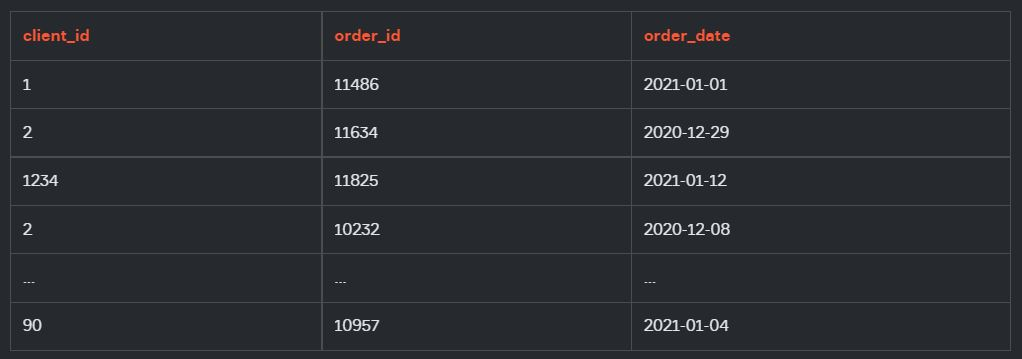

In [6]:
from IPython.display import Image
Image("SQL_1.JPG")

In [ ]:
Для выполнения задания использовался PostgreSQL

'''
select 
   sq.count_client_id,
   sq.order_date_to_month,
   (count_client_id-lag(sq.count_client_id,1) over w)*100/count_client_id as difference
from (
    select 
        count (distinct client_id) as count_client_id,
        date_trunc('month',order_date)::date as order_date_to_Month 
    from table
    group by order_date_to_Month
) as sq 
window w as()

order by order_date_to_month
limit 100
'''

2. Вывести сумму GMV (Gross Merchandise Value) с нарастающим итогом по дням.

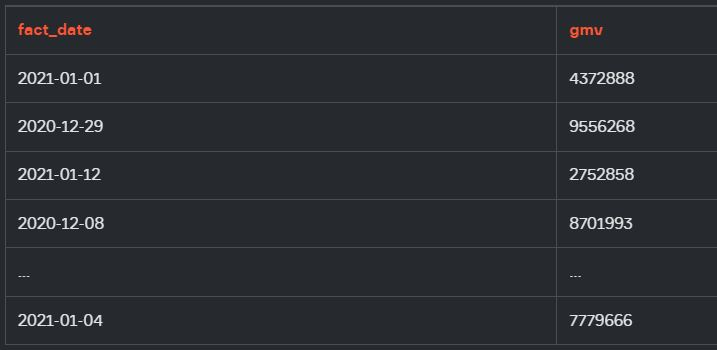

In [8]:
Image("SQL_2.JPG")

In [1]:
Из задания не до конца ясно как интерпретировать "по дням". Поэтому рассмотрю 2 варианта:

    1. Группирую все транзакции за один день, и считаю сумму (т.е одна строка и сумма за одну дату) 


'''
select 
   sq.fact_date,
   sq.gmv,
   sum (gmv) over w as sum_gmv_to_current_date
from (
    select 
        gmv,
        fact_date 
    from table
    group by gmv, fact_date
    ) as sq 
window w as(
order by fact_date
rows between unbounded preceding and current row
)



2. Нарастающий итог считаю по каждой строчке, вне зависимости от наличия еще строк за аналогичную дату 
(т.е за одну дату может быть столько строк, сколько транзакций отражено)

select 
    fact_date,
    gmv,
    sum (gmv) over w as sum_gmv_to_current_date
from table
window w as(
    order by fact_date
    rows between unbounded preceding and current row
)

'''

'\nselect \n   sq.fact_date,\n   sq.gmv,\n   sum (gmv) over w as sum_gmv_to_current_date\nfrom (\n    select \n        order_id as gmv,\n        order_date as fact_date \n    from customers\n    group by gmv, fact_date\n    ) as sq \nwindow w as(\norder by fact_date\nrows between unbounded preceding and current row\n)\n\n\n'

3. Получить время отклика на каждое письмо (письмо идентифицируется по полю mail_id), отправленное пользователем mr_employee@ozon.ru.

Дана таблица с логом электронных писем пользователя mr_employee@ozon.ru (т.е. письма, отправленные с этой электронной почты и полученные на нее). У всех цепочек сообщений уникальная тема. В одной цепочкеможет быть несколько писем.

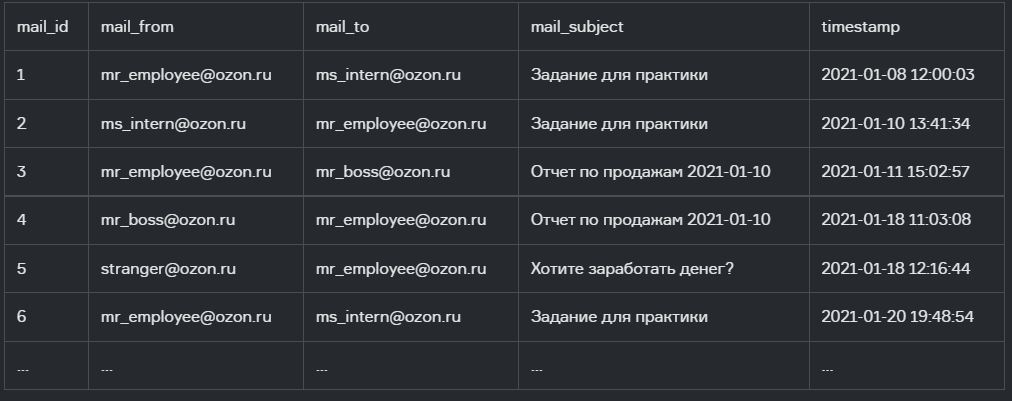

In [9]:
Image("SQL_3.JPG")

In [1]:
'''
1 вариант:

select
sq.mail_id,
sq.mail_from,
sq.mail_subject,
sq.timestamp,
sq.reply_date-sq.timestamp as days_for_reply
from(
    select
        mail_id,
        mail_from,
        mail_subject,
        timestamp,
        lead (timestamp, 1) over w as reply_date,
        lead (mail_to, 1) over w as reply_mail_to
    from pro_test_1
    window w as(
order by mail_subject, timestamp
rows between current row and unbounded following)
    ) as sq
where mail_from=reply_mail_to and mail_from='mr_employee@ozon.ru' 


2 Вариант:

select
    mail_id,
    mail_subject,
    timestamp,
    min (reply_date-timestamp) as days_for_reply
from (
    select
        l.mail_id as mail_id,
        r.mail_to as mail_to,
        l.mail_subject as mail_subject,
        l.timestamp as timestamp,
        reply_date
    from
        (
        select 
            mail_id,
            mail_from,
            mail_subject,
            timestamp 
        from table
        where mail_from = 'mr_employee@ozon.ru'
        order by mail_subject, timestamp
        ) as l
    join
        (
        select 
            mail_id,
            mail_to,
            mail_subject,
            timestamp as reply_date
        from table
        where mail_to = 'mr_employee@ozon.ru'
        order by mail_subject, timestamp
        ) as r
    on l.mail_from=r.mail_to
    where timestamp < reply_date and r.mail_subject=l.mail_subject
    order by mail_subject, timestamp, reply_date
    ) as sq
group by mail_id,
         mail_subject,
         timestamp
order by mail_subject, timestamp

'''

"\n1 вариант:\n\nselect\nsq.mail_id,\nsq.mail_from,\nsq.mail_subject,\nsq.timestamp,\nsq.reply_date-sq.timestamp as days_for_reply\nfrom(\n    select\n        mail_id,\n        mail_from,\n        mail_subject,\n        timestamp,\n        lead (timestamp, 1) over w as reply_date,\n        lead (mail_to, 1) over w as reply_mail_to\n    from pro_test_1\n    window w as(\norder by mail_subject, timestamp\nrows between current row and unbounded following)\n    ) as sq\nwhere mail_from=reply_mail_to and mail_from='mr_employee@ozon.ru' \n\n\n2 Вариант:\n\nselect\n    mail_id,\n    mail_subject,\n    timestamp,\n    min (reply_date-timestamp) as days_for_reply\nfrom (\n    select\n        l.mail_id as mail_id,\n        r.mail_to as mail_to,\n        l.mail_subject as mail_subject,\n        l.timestamp as timestamp,\n        reply_date\n    from\n        (\n        select \n            mail_id,\n            mail_from,\n            mail_subject,\n            timestamp \n        from table\n   

4. Вывести id сотрудников с разницей в заработной плате в пределах 5000 рублей.

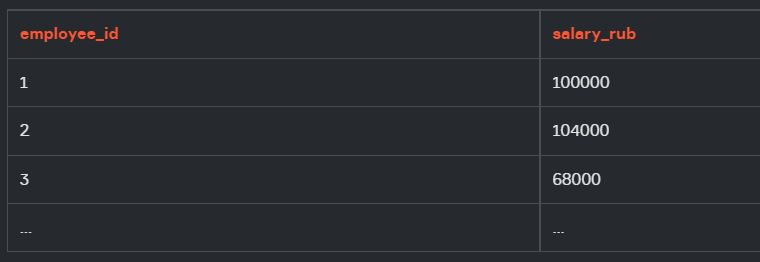

In [10]:
Image("SQL_4.JPG")

In [ ]:
'''

SELECT
    employee_id,
    salary_rub,
    STRING_AGG(employee_id, ', ') OVER w AS list_of_ID
FROM table
WINDOW w AS (
    ORDER BY salary_rub
    RANGE BETWEEN 5000 preceding AND 5000 following
    
    
    
'''
